<a href="https://colab.research.google.com/github/eserrabaysal/course-notes/blob/main/day4.2ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64


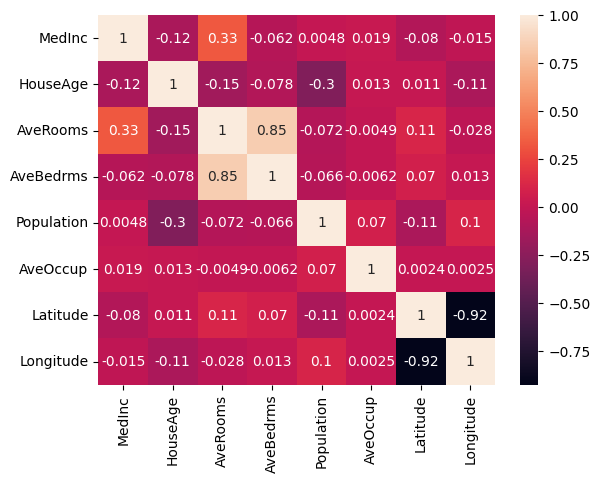

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# California housing veri setini yükle
housing = fetch_california_housing()
x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# İlk 5 satırı inceleme
print(x.head())

# Hedef değişkenin istatistiksel özeti
print(pd.Series(y).describe())

# Özellikler arasındaki korelasyon matrisi
corr_matrix = x.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


In [ ]:
print("Katsayılar:",model.coef_)
print("Sabit Terim:",model.intercept_)

Katsayılar: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Sabit Terim: -37.02327770606409


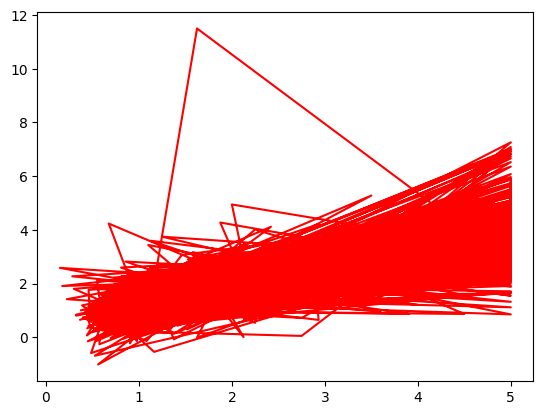

In [ ]:
plt.plot(y_test,y_pred, color='red')

plt.show()

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Veri setini yükleme (California Ev Fiyatları)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Veriyi ölçeklendirme (önemli!)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı alpha değerleri için Ridge regresyonu ve değerlendirme
alphas = [0.1, 1.0, 10.0, 100.0]
for alpha in alphas:
    # Ridge regresyon modeli oluşturma
    ridge_reg = Ridge(alpha=alpha)

    # Modeli eğitme
    ridge_reg.fit(X_train, y_train)

    # Test setinde tahmin yapma
    y_pred = ridge_reg.predict(X_test)

    # Değerlendirme metrikleri
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Alpha = {alpha}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R-squared: {r2:.2f}")

# En iyi modelin katsayılarına bakma (örneğin, alpha=1 için)
best_alpha = 1.0
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)
print("En iyi modelin katsayıları:")
print(best_model.coef_)

Alpha = 0.1
  MSE: 0.56
  MAE: 0.53
  R-squared: 0.58
Alpha = 1.0
  MSE: 0.56
  MAE: 0.53
  R-squared: 0.58
Alpha = 10.0
  MSE: 0.56
  MAE: 0.53
  R-squared: 0.58
Alpha = 100.0
  MSE: 0.55
  MAE: 0.53
  R-squared: 0.58
En iyi modelin katsayıları:
[ 0.85231009  0.12246004 -0.3048709   0.37081855 -0.00227294 -0.03662725
 -0.89588451 -0.86816501]


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri setini yükleme (California Ev Fiyatları)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Veriyi ölçeklendirme
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklı alpha ve l1_ratio değerleri için Elastic Net regresyonu ve değerlendirme
alphas = [0.01, 0.1, 0.5]#karmaşıklığını kontrol ederek aşırı öğrenmeyi (overfitting) önlemeye yardımcı olur
l1_ratios = [0.2, 0.5, 0.8]#0 değeri Ridge'e, 1 değeri Lasso'ya karşılık gelir.

for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Elastic Net regresyon modeli oluşturma
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

        # Modeli eğitme
        elastic_net.fit(X_train, y_train)

        # Test setinde tahmin yapma
        y_pred = elastic_net.predict(X_test)

        # Değerlendirme metrikleri
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Alpha = {alpha}, l1_ratio = {l1_ratio}")
        print(f"  MSE: {mse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  R-squared: {r2:.2f}")

# En iyi modelin katsayılarına bakma (örneğin, alpha=1, l1_ratio=0.5 için)
best_alpha = 0.01
best_l1_ratio = 0.5
best_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_model.fit(X_train, y_train)
print("En iyi modelin katsayıları:")
print(best_model.coef_)

# Hangi özellikler seçildi?
selected_features = data.columns[best_model.coef_ != 0]
print("Seçilen özellikler:", selected_features)

Alpha = 0.01, l1_ratio = 0.2
  MSE: 0.55
  MAE: 0.53
  R-squared: 0.58
Alpha = 0.01, l1_ratio = 0.5
  MSE: 0.55
  MAE: 0.53
  R-squared: 0.58
Alpha = 0.01, l1_ratio = 0.8
  MSE: 0.55
  MAE: 0.53
  R-squared: 0.58
Alpha = 0.1, l1_ratio = 0.2
  MSE: 0.60
  MAE: 0.58
  R-squared: 0.54
Alpha = 0.1, l1_ratio = 0.5
  MSE: 0.64
  MAE: 0.60
  R-squared: 0.51
Alpha = 0.1, l1_ratio = 0.8
  MSE: 0.67
  MAE: 0.62
  R-squared: 0.49
Alpha = 0.5, l1_ratio = 0.2
  MSE: 0.76
  MAE: 0.67
  R-squared: 0.42
Alpha = 0.5, l1_ratio = 0.5
  MSE: 0.83
  MAE: 0.70
  R-squared: 0.37
Alpha = 0.5, l1_ratio = 0.8
  MSE: 0.88
  MAE: 0.73
  R-squared: 0.33
En iyi modelin katsayıları:
[ 0.8194602   0.12989299 -0.21753612  0.27392626  0.         -0.03268378
 -0.78971941 -0.75744488]
Seçilen özellikler: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')
